In [13]:
import cv2
import numpy as np
from skimage import io

import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from collections import Counter

In [14]:
img = io.imread('https://i.stack.imgur.com/DNM65.png')[:, :, :-1]

In [15]:
img.shape

(238, 363, 3)

In [16]:
# https://stackoverflow.com/questions/43111029/how-to-find-the-average-colour-of-an-image-in-python-with-opencv

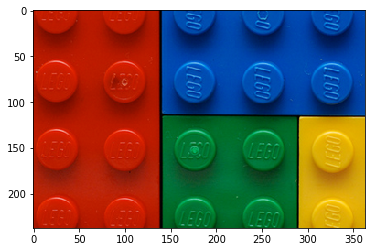

In [17]:
plt.imshow(img);

In [18]:
# https://adamspannbauer.github.io/2018/03/02/app-icon-dominant-colors/

def get_dom_color(image, k, resize=None):
    
    if resize is not None: 
        image = cv2.resize(image, resize, interpolation = cv2.INTER_AREA)
        
    image = image.reshape((image.shape[0] * image.shape[1], 3))
    
    clt = KMeans(n_clusters=k)
    labels = clt.fit_predict(image)
    
    
    label_counts = Counter(labels)
    
    dom_color = clt.cluster_centers_[label_counts.most_common(1)[0][0]]
    
    return list(dom_color)

In [19]:
get_dom_color(img, 4)

[179.13082611072582, 27.28028971455283, 2.29044184498958]

In [23]:
img = cv2.resize(img, (25, 15), interpolation = cv2.INTER_AREA)
#resizing to smaller so that the calculations will be faster (see axis to determine how small it was shrunk)

# plt.imshow(img)
img.shape

(15, 25, 3)

In [9]:
img = img.reshape((img.shape[0] * img.shape[1], 3))
img

array([[179,  25,   0],
       [178,  24,   0],
       [188,  28,   0],
       ...,
       [213, 165,   2],
       [214, 164,   1],
       [214, 165,   0]], dtype=uint8)

In [10]:
img.shape, 238*363 #now array in 2D ???

((86394, 3), 86394)

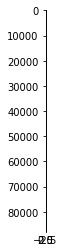

In [11]:
plt.imshow(img)

In [82]:
clt = KMeans(n_clusters=4)
clt

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [83]:
labels = clt.fit_predict(img)
labels

array([0, 0, 0, ..., 3, 3, 3], dtype=int32)

In [84]:
label_counts = Counter(labels)
label_counts

Counter({0: 32999, 2: 20864, 1: 23692, 3: 8839})

In [85]:
# dom_color = clt.cluster_centers_[label_counts.most_common(1)[0][0]]
label_counts.most_common(1) #the "1" means how many most common (i.e. the top what?)

[(0, 32999)]

In [86]:
label_counts.most_common(1)[0][0]

0

In [87]:
clt.cluster_centers_[label_counts.most_common(1)[0][0]]

array([179.13073123,  27.28258432,   2.29058456])

In [91]:
dom_color = clt.cluster_centers_[label_counts.most_common(1)[0][0]]
dom_color

#represents the RGB values of the DOMINANT color
# so if we imput these rgb values into a color codes chart, 
# then the resulting color will the dominant color

array([179.13073123,  27.28258432,   2.29058456])